In [1]:
from gradient_errors import Environment
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

In [19]:
env = Environment('data_normal.xlsx')

In [51]:
V_1 = env.P0 * 50 * 10**(-6) / (9.81 * 885 * (env.h1 - env.h2) / 100)
V_1

tensor(0.0022, dtype=torch.float64, grad_fn=<DivBackward0>)

In [52]:
V_2 = env.P0 * 50 * 10**(-6) / (9.81 * 885 * (env.h3 - env.h4) / 100) - V_1
V_2

tensor(0.0012, dtype=torch.float64, grad_fn=<SubBackward0>)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


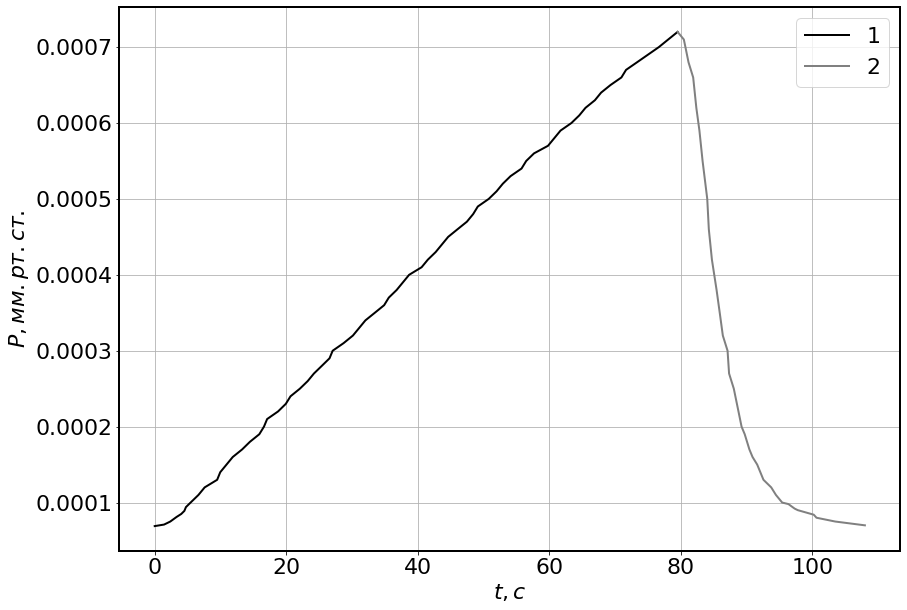

In [20]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

ax.plot(env.T1.t.detach().numpy()[:71], env.T1.P.detach().numpy()[:71], linewidth=2, c='black', label='1')
ax.plot(env.T1.t.detach().numpy()[70:], env.T1.P.detach().numpy()[70:], linewidth=2, c='gray', label='2')

ax.set_ylabel(r"$P, мм. рт. ст.$")
ax.set_xlabel(r"$t, с$")
ax.legend()
fig.savefig(r'../images/Pt.eps', format='eps')

In [78]:
lnP = torch.log(env.T12.P - env.Pm*1.11)
a, b = env.chi2(env.T12.t, lnP)

Using reversed axis


D:\mipt_edu\2sem\labs\2.3.1\process\gradient_errors.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x).numpy(), torch.tensor(y).numpy()
D:\mipt_edu\2sem\labs\2.3.1\process\gradient_errors.py:113: RuntimeWarning: divide by zero encountered in true_divide
  reverse_axis = (np.mean(errors_x / x) > np.mean(errors_y / y)) and auto_reverse


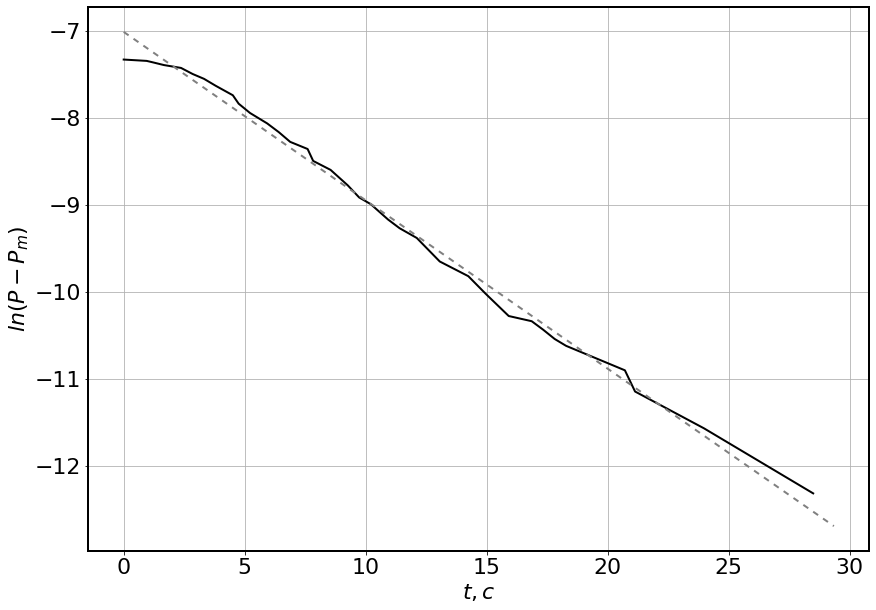

In [79]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()


ax.plot(env.T12.t.detach().numpy(), lnP.detach().numpy(), linewidth=2, c='black')

X = np.array([min(env.T12.t.detach().numpy())*0.97, max(env.T12.t.detach().numpy())*1.03])
Y = a.item() + b.item()*X
ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 3])


ax.set_ylabel(r"$ln (P - P_m)$")
ax.set_xlabel(r"$t, с$")
fig.savefig(r'../images/Pdownt.eps', format='eps')

In [80]:
W = -b * V_2
W*1000

tensor(0.2344, dtype=torch.float64, grad_fn=<MulBackward0>)

In [81]:
a, b = env.chi2(env.T11.t, env.T11.P)

Using reversed axis


D:\mipt_edu\2sem\labs\2.3.1\process\gradient_errors.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x).numpy(), torch.tensor(y).numpy()
D:\mipt_edu\2sem\labs\2.3.1\process\gradient_errors.py:113: RuntimeWarning: divide by zero encountered in true_divide
  reverse_axis = (np.mean(errors_x / x) > np.mean(errors_y / y)) and auto_reverse


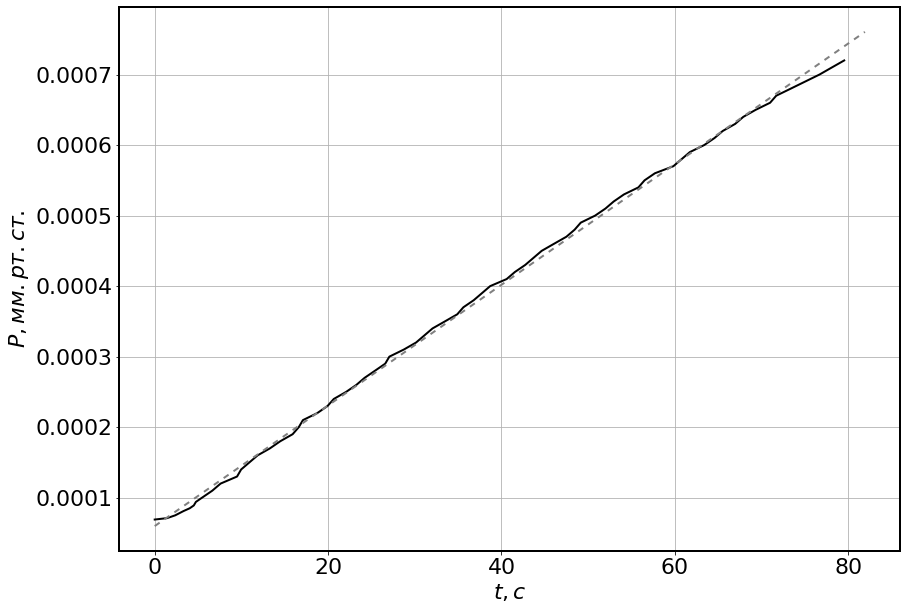

In [82]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()


ax.plot(env.T11.t.detach().numpy(), env.T11.P.detach().numpy(), linewidth=2, c='black')

X = np.array([min(env.T11.t.detach().numpy())*0.97, max(env.T11.t.detach().numpy())*1.03])
Y = a.item() + b.item()*X
ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 3])


ax.set_ylabel(r"$P, мм. рт. ст.$")
ax.set_xlabel(r"$t, с$")
fig.savefig(r'../images/Pupt.eps', format='eps')

In [83]:
Q = b * V_2
Q

tensor(1.0377e-08, dtype=torch.float64, grad_fn=<MulBackward0>)

In [95]:
W2 = 1 / (env.Py - env.Pm*1.11) * 4/3 * (0.8/1000/2)**3 * (2 * np.pi * 8.31 * (273 + 20) / (29 / 1000))**0.5 * env.Pv / 0.108
W2*1000

tensor(0.0649, dtype=torch.float64, grad_fn=<MulBackward0>)

In [96]:
env.show(W, name='W1')

('2.34', '0.07', -4)

In [97]:
env.show(W2, name='W2')

('6.5', '1.9', -5)

In [98]:
env.show(Q, name='Q')

('1.038', '0.036', -8)

In [100]:
env.show(V_1, name='V_1')

('2.179', '0.021', -3)

In [101]:
env.show(V_2, name='V_2')

('1.21', '0.04', -3)